In [6]:
import matplotlib.pyplot as plt
import time 
import numpy as np
from astropy.io import fits
import os

In [7]:
directorio='/Users/oscar/Documents/Documentos/Docs/LME/CCD/OscuraImagenes/'
contenido = os.listdir(directorio)
im=directorio+contenido[4]
hdulist = fits.open(im)

In [16]:
hdulist[4].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =               134400 / length of data axis 1                          
NAXIS2  =                  100 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
ANSAMP  = '400     '           / Smart sequencer variable                       
CCDNCOL = '2216    '           / Smart sequencer variable                       
CCDNPRES= '7       '           / Smart sequencer variable                       
CCDNROW = '2556    '           / Smart sequencer variable                       
NCOL    = '1200    '           / Smart sequencer variable                       
NCOL1   = '1107    '        

In [ ]:
hdulist.info()

In [8]:
tamx=int(hdulist[4].header['NAXIS1'])
tamy=int(hdulist[4].header['NAXIS2'])
nsamp=int(hdulist[4].header['NSAMP'])
ncol=int(hdulist[4].header['NCOL'])
ccdncol=int(hdulist[4].header['CCDNCOL'])
tamxpimg=int(tamx/nsamp)
scidata = hdulist[4].data
img_individual= np.zeros((tamy, tamxpimg),dtype='i4')
img_individual_sinoffset= np.zeros((tamy, tamxpimg),dtype='i4')

In [ ]:
print(tamxpimg)

In [9]:
#Se extrae imagen individual
for k in range (0,tamxpimg):
    img_individual[:,k]=scidata[:,k*nsamp]

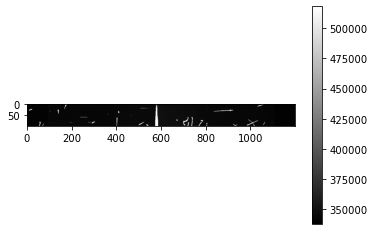

In [10]:
plt.figure()
plt.imshow(img_individual, cmap='gray')
plt.colorbar()

In [11]:
for i in range(tamy):
    offset=np.mean(img_individual[i,(tamxpimg-int(ncol-ccdncol/2)):])
    img_individual_sinoffset[i,:]=img_individual[i,:]-offset

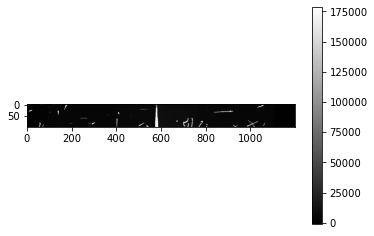

In [12]:
plt.figure()
plt.imshow(img_individual_sinoffset, cmap='gray')
plt.colorbar()

In [13]:
primary_hdu1=fits.PrimaryHDU(img_individual_sinoffset)
hdul=fits.HDUList([primary_hdu1])    
hdul.writeto('1ccdimagen5_sinoffset.fits',overwrite=True)
print("Fin")

Fin


In [15]:
img_individual[16][580]

515329